# Visualization Using Python
## Ilsa Khan Baqai - PyCon 2019 Karachi AI Meetup

Different visualizations will be demonstrated via this notebook. In order to implement one thing, we have multiple libraries implemented in Python so I will be using them interchangebly to give a flavor of each library. 

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as py
from  plotly.offline import iplot, init_notebook_mode #not using chart_studio as it requires online interaction

#for geospatial data
from folium.plugins import HeatMap, FastMarkerCluster

#data manipulation
import pandas as pd
import numpy as np

#path setting etc
import os

In [83]:
# Reading different data files for plotting
EuropeanLeaders = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/european_leaders.csv")

schoolEarnings = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

ebola = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_ebola.csv")

file_url = 'http://www2.census.gov/geo/docs/maps-data/data/gazetteer/2016_Gazetteer/2016_Gaz_zcta_national.zip'

dataClusterMap = pd.read_csv(file_url, sep='\t', dtype={'GEOID' : object}) 


### Vertical Bar Charts
#### Usage: Comparing data grouped by discrete categories (<10 categories)
#### Example Data: Gender gap in each class/School

In [3]:
# Using Pyplot
VerticalBar = [py.Bar(x=schoolEarnings.School,y=schoolEarnings.Gap)]


fig = py.Figure(
    data=VerticalBar,
    layout_title_text="Gender Gap in top Universities"
)


fig.show()



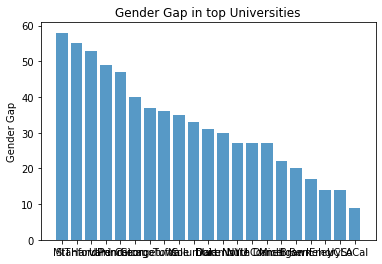

In [4]:
# Using matplotlib
objects = schoolEarnings.School
y_pos = np.arange(len(schoolEarnings.School))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, schoolEarnings.Gap, align='center', alpha=0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Gender Gap')
plt.title("Gender Gap in top Universities")

plt.show()

### uh-oh! Chart too small to be comprehended! 

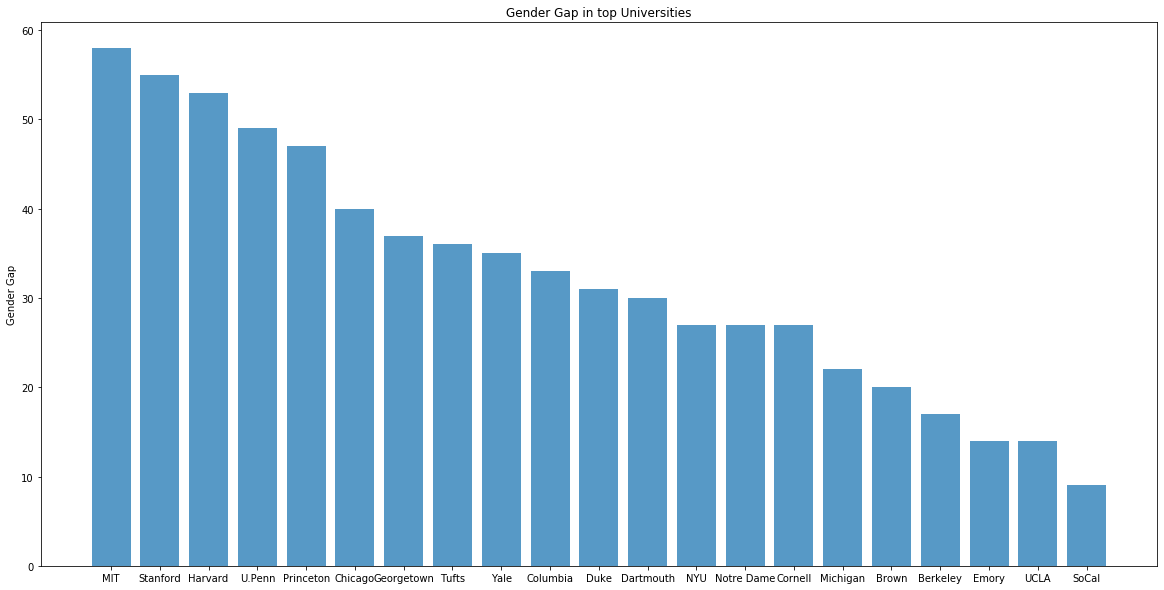

In [5]:
fig = plt.figure(figsize=(20,10)) #define figure size! (can add other parameters too: link: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html)
plt.bar(y_pos, schoolEarnings.Gap, align='center', alpha=0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Gender Gap')
plt.title("Gender Gap in top Universities")


plt.show()

In [7]:
#Horizontal Bar Charts Using plotly; same code as vertical charts but orientation set to "h" (horizontal) and x and y data swapped
# Using Pyplot
VerticalBar = [py.Bar(y=schoolEarnings.School,x=schoolEarnings.Gap,orientation="h")]


fig = py.Figure(
    data=VerticalBar,
    layout_title_text="Gender Gap in top Universities"
)


fig.show()


### For the axis labels' size you will have to further adjust them accordingly in matplotlib whreas plotly adjusts this itself

### Stacked Bar Charts
#### Usage: Show size of group relative to other group, demonstrate group’s behavior
#### Example Data: Gender distribution in each class/School

Text(0.5, 0, 'School')

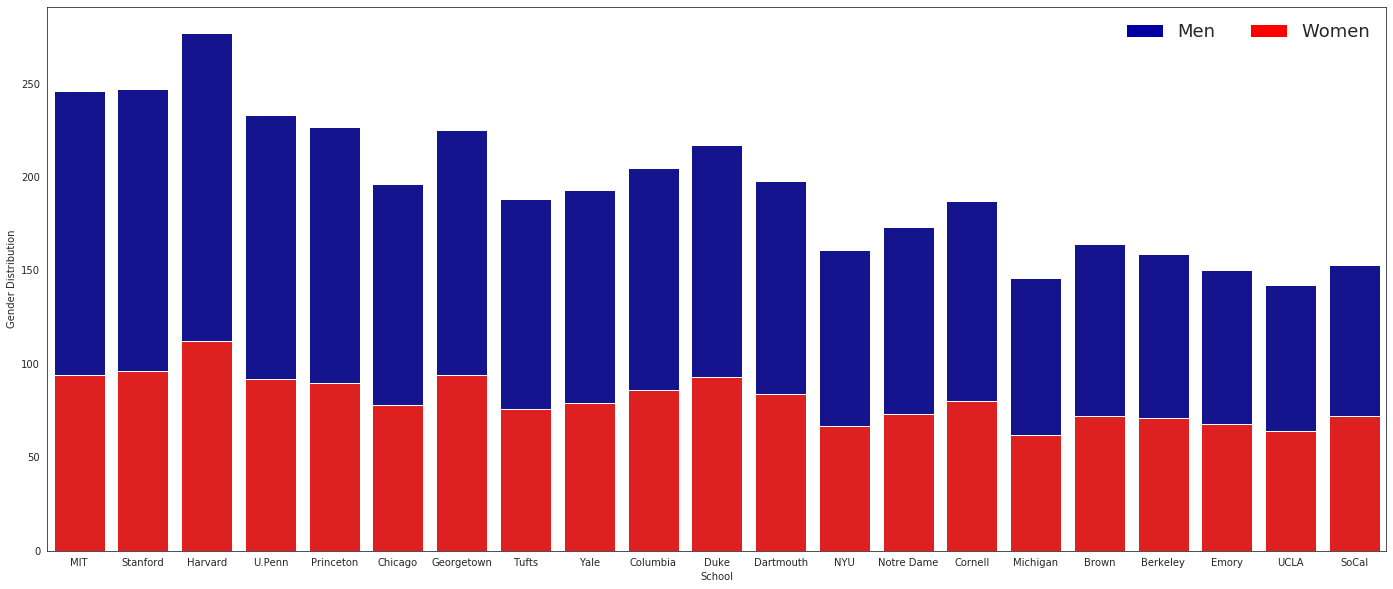

In [14]:
#Using Seaboron

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = schoolEarnings.School, y = schoolEarnings.Men+schoolEarnings.Women, color = "#0000A3")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = schoolEarnings.School, y = schoolEarnings.Women, color = "red")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar,topbar], ['Men', 'Women'], loc=1, ncol = 2, prop={'size':18})
l.draw_frame(False)

#Optional code - Make plot look nicer
bottom_plot.set_ylabel("Gender Distribution")
bottom_plot.set_xlabel("School")

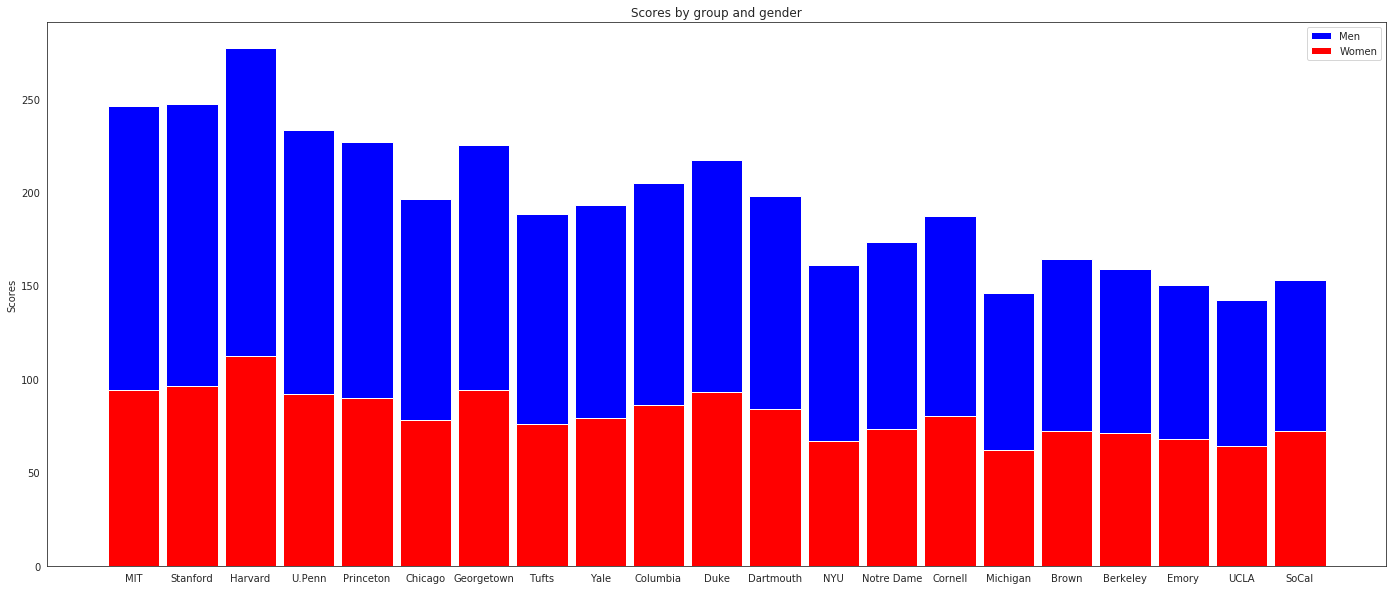

In [164]:
#using matplotlib
width = 0.88    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(schoolEarnings.School, schoolEarnings.Men+schoolEarnings.Women,   width, color='b')
p2 = plt.bar(schoolEarnings.School, schoolEarnings.Women, width, color='r')

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.legend( (p1[0], p2[0]), ('Men', 'Women') )

plt.show()


### Histograms
#### Usage: Show data distribution
#### Example Data: Gender distribution in each class/School

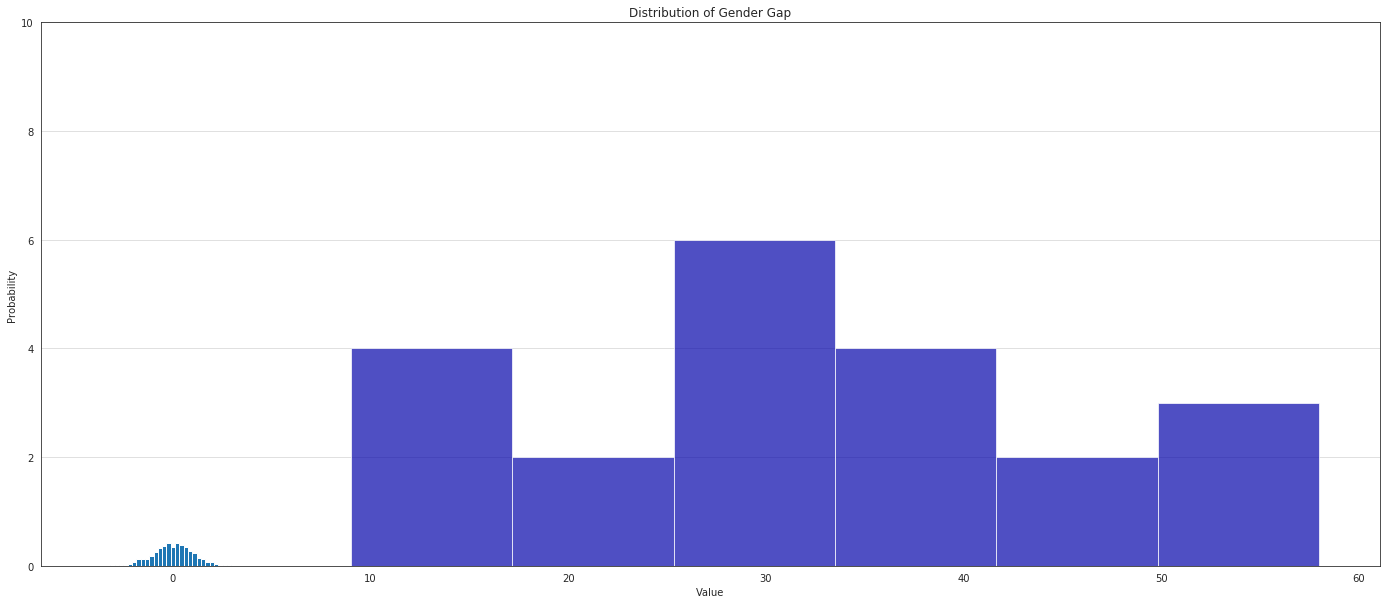

In [20]:
schoolEarnings.head(5)
bins = [0, 10, 30, 50, 75, 100]
bins = [0, 10, 30, 50, 100]
labels =["Negligible","Minor" ,"Moderate","Major"]
schoolEarnings['binned'] = pd.cut(schoolEarnings['Gap'], bins,labels=labels)
# print (schoolEarnings)
#schoolEarnings.hist(column='Gap')

#using matplotlib

n, bins, patches = plt.hist(x=schoolEarnings.Gap, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Gender Gap')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#another way in Python
#plt.hist(schoolEarnings.Gap, density=True, bins=8)
#plt.ylabel('Probability');



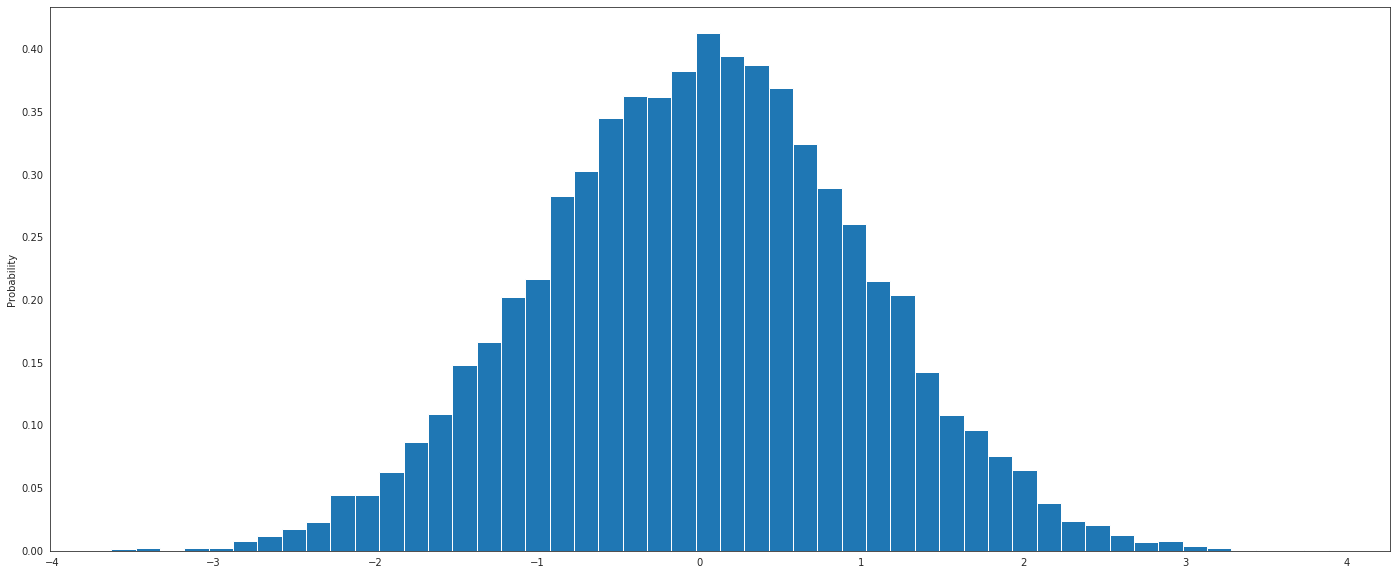

In [33]:
# Historgrams are also usually drawn on numeric data that is continuous, to illustrate:

x = np.random.normal(size = 10000)
plt.hist(x, density=True, bins=50)
plt.ylabel('Probability');

Text(0.5, 0, 'vert_min of political parties')

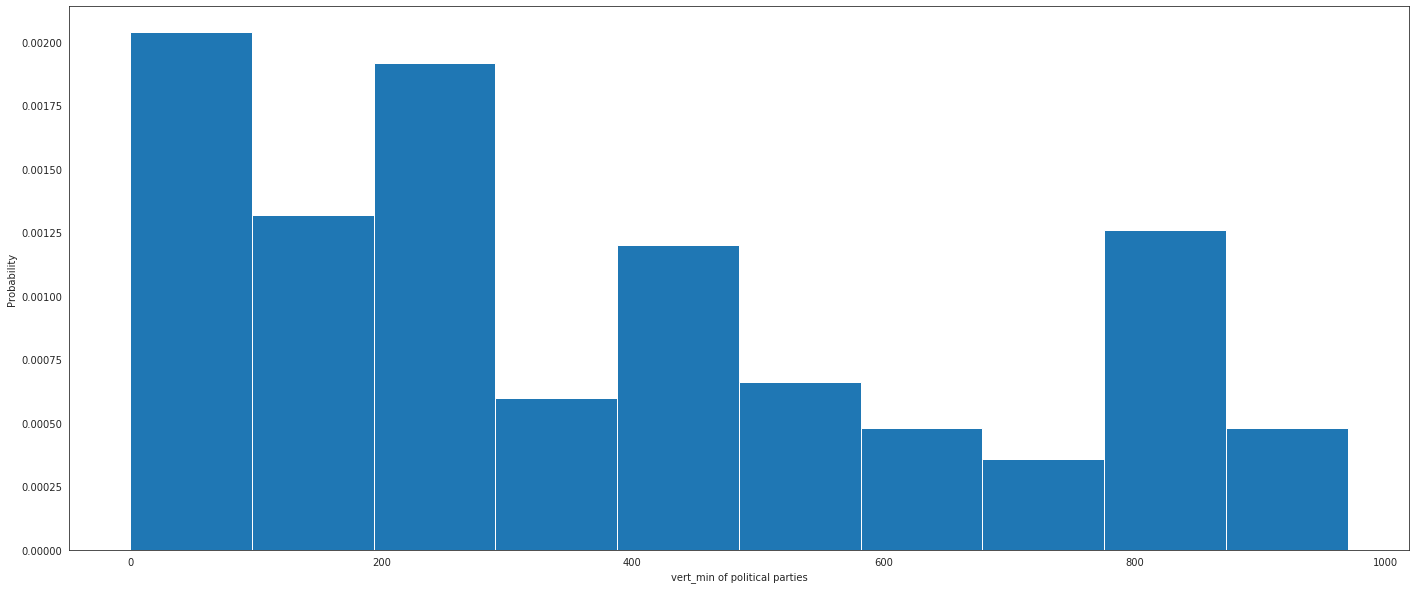

In [44]:
plt.hist(EuropeanLeaders['vert_min'],density=True,bins=10)
plt.ylabel('Probability')
plt.xlabel("vert_min of political parties")

### Pie Chart
#### Usage: Understand parts of a whole
#### Example Data: Percentage of students in each school

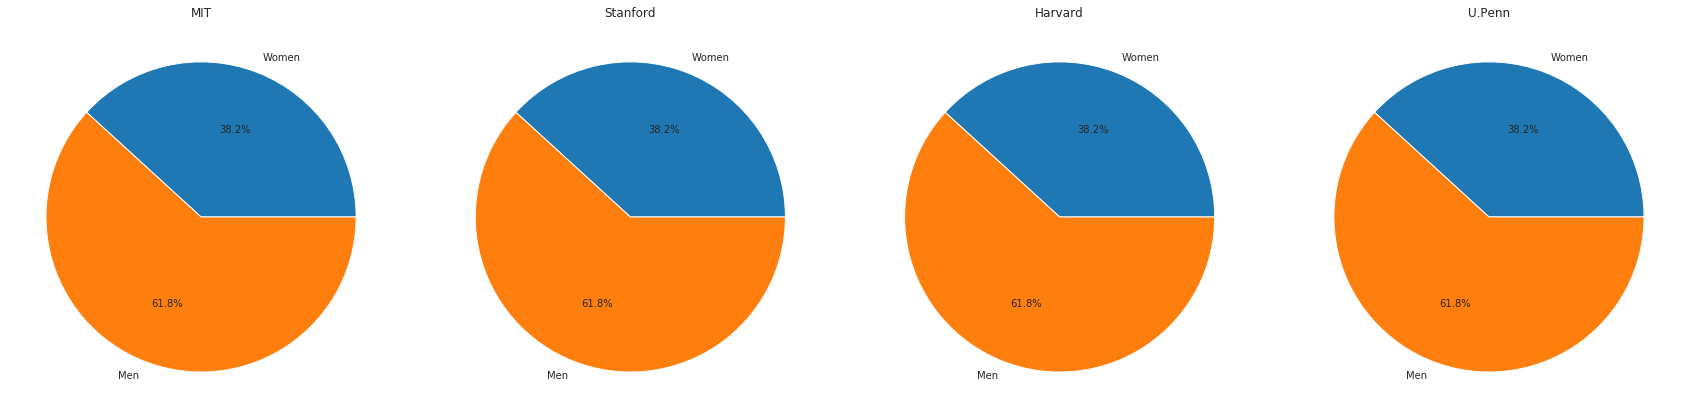

In [176]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

sortedschoolEarnings = schoolEarnings.sort_values(by="Gap", ascending = False)
dataForpie = sortedschoolEarnings.head(4)

labels = [schoolEarnings.columns[1],schoolEarnings.columns[2]]

#define rows and colummns for subplots creation

#using matplotlib
fig1, axs = plt.subplots(1,4) 
fig1.tight_layout()

for row in dataForpie.iterrows():
    piedata = [row[1]['Women'],row[1]['Men']]
    axs[row[0]].pie([piedata1.Women,piedata1.Men],labels=labels, autopct='%1.1f%%')
    axs[row[0]].title.set_text(row[1]["School"])
#plt.subplots_adjust(left=0.05, bottom=0.2, right=0.9, top=0.9, wspace=0.003, hspace=2)
plt.show()


In [177]:
#using plotly
values = [schoolEarnings.loc[0]['Women'],schoolEarnings.loc[0]['Men']]
fig = py.Figure(data=[py.Pie(labels=labels, values=values)])
fig.show()

In [217]:
#dataForpie = schoolEarnings.head(4)
fig = {
    'data': [
        {
            'labels': labels,
            'values': [dataForpie.iloc[0]["Women"],dataForpie.iloc[0]["Men"]],
            'type': 'pie',
            'name': dataForpie.iloc[0]["School"],
            'domain': {'x': [0, .48],
                       'y': [0, .49]},
            'hoverinfo':'label+percent',
            'textinfo':'none'
        },
        {
            'labels': labels,
            'values': [dataForpie.iloc[1]["Women"],dataForpie.iloc[1]["Men"]],
            'type': 'pie',
            'name': dataForpie.iloc[1]["School"],
            'domain': {'x': [.52, 1],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'

        },
        {
            'labels': labels,
            'values': [dataForpie.iloc[2]["Women"],dataForpie.iloc[2]["Men"]],
            'type': 'pie',
            'name': dataForpie.iloc[2]["School"],
            'domain': {'x': [0, .48],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': labels,
            'values': [dataForpie.iloc[3]["Women"],dataForpie.iloc[3]["Men"]],
            'type': 'pie',
            'name':dataForpie.iloc[3]["School"],
            'domain': {'x': [.52, 1],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent',
            'textinfo':'none'
        }
    ],
    'layout': {'title': 'Gender Distribution Across Different Schools.',
               'showlegend': False,
              "annotations": [
      {
        "x": 0.1, 
        "y": 1.0, 
        "font": {"size": 16}, 
        "text": dataForpie.iloc[0]["School"], 
        "xref": "paper", 
        "yref": "paper", 
        "xanchor": "center", 
        "yanchor": "bottom", 
        "showarrow": False
      }, 
      {
        "x": 0.65, 
        "y": 1.0, 
        "font": {"size": 16}, 
        "text": dataForpie.iloc[1]["School"], 
        "xref": "paper", 
        "yref": "paper", 
        "xanchor": "center", 
        "yanchor": "bottom", 
        "showarrow": False
      }, 
      {
        "x": 0.1, 
        "y": 0.375, 
        "font": {"size": 16}, 
        "text": dataForpie.iloc[2]["School"],
        "xref": "paper", 
        "yref": "paper", 
        "xanchor": "center", 
        "yanchor": "bottom", 
        "showarrow": False
      }, 
      {
        "x": 0.62, 
        "y": 0.375, 
        "font": {"size": 16}, 
        "text": dataForpie.iloc[3]["School"], 
        "xref": "paper", 
        "yref": "paper", 
        "xanchor": "center", 
        "yanchor": "bottom", 
        "showarrow": False
      }
    ]}
    
    
}


iplot(fig, filename='pie_chart_subplots')

### Boxplots
### To compare distributions across groups

In [88]:
fig = py.Figure()
y0 = np.random.randn(50) - 1
y1 = np.random.randn(50) + 1
fig.add_trace(py.Box(y=y0))
fig.add_trace(py.Box(y=y1))

fig.show()

### choropleth:  a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income.
#### Usage: To show regional data 
#### Example Data: region wise disease spread etc.

In [61]:
#ebola
choroplethdata=ebola.groupby(['Country']).sum().reset_index()
choroplethdata

Country  Month  Year    Lat    Lon   Value
0        Guinea     75   140  99.50 -97.00  3303.0
1       Liberia     72   126  57.87 -84.87  5241.0
2          Mali     21    28  35.14  -8.00     9.0
3       Senegal     17    28  29.00 -28.90     4.0
4  Sierra Leone     68   112  67.68 -94.24  3978.0

In [71]:

country_geo = os.path.join('./countrydata.json')

m = folium.Map(location=[14.335443, -10.141516], zoom_start=8)
m.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=choroplethdata,
 columns=['Country', 'Value'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.5,
 line_opacity=1,
 legend_name='Ebola Cases'
)
folium.LayerControl().add_to(m)

m.save('ebola Cases in 2014.html')

In [72]:
m2 = folium.Map(location=[14.335443, -10.141516], zoom_start=8)
HeatMap(ebola[["Lat","Lon"]]).add_to(m2)
m2

### Clustermap
#### To show how geospatial data clusters and behaviour wrt to different geigraphic regions
#### Total votes and their distribution across different cities for a particular candidate

In [86]:
#creating a map that's centered to our sample
dataClusterMap.columns = ['GEOID', 'ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI', 'INTPTLAT','INTPTLONG']
some_map = folium.Map(location=[dataClusterMap['INTPTLAT'].mean(), 
                                dataClusterMap['INTPTLONG'].mean()], 
                                zoom_start=4)

some_map.add_child(FastMarkerCluster(dataClusterMap[['INTPTLAT', 'INTPTLONG']].values.tolist()))
some_map